<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/Assignment2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Housing (1).csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
svar_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def binary_mapping(x):
  return x.map({'yes':1, 'no':0})

df[svar_list] = df[svar_list].apply(binary_mapping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
def get_modified_inputs(X):
  x_0 = np.ones([X.shape[0], 1])
  inputs= np.concatenate((x_0, X), axis = -1)
  return inputs

In [ ]:
def compute_cost(X,y,theta):
  M = X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * M) * np.sum(sqrErrors)
  return J

In [ ]:
def compute_cost_regularized(X, y, theta, lamda):
  M = X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  reg_term = lamda * np.sum(np.square(theta[1:]))
  J =  1 / (2 * M)* (np.sum(sqrErrors) + reg_term)
  return J

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr, n_epochs, lamda = None):
  thetas = np.zeros([X_train.shape[1], 1])
  train_losses = []
  test_losses = []
  train_cost_history = np.zeros(n_epochs)
  test_cost_history = np.zeros(n_epochs)
  M=X_train.shape[0]
  for i in range(n_epochs):
    predictions = X_train.dot(thetas)
    errors = np.subtract(predictions, y_train)
    sum_delta = (lr / M) * X_train.transpose().dot(errors)
    if lamda!=None:
      sum_delta[1:] +=  lr * lamda /M * thetas[1:]
    thetas = thetas - sum_delta;
    if lamda==None:
      train_loss = compute_cost(X_train, y_train, thetas)
      train_cost_history[i] = train_loss
      test_loss = compute_cost(X_test, y_test, thetas)
      test_cost_history[i] = test_loss
    if lamda!=None:
      train_loss = compute_cost_regularized(X_train, y_train, thetas, lamda)
      train_cost_history[i] = train_loss
      test_loss = compute_cost(X_test, y_test, thetas)
      test_cost_history[i] = test_loss
    if i % 10 == 0:
      print('Epoch %d, Train Loss %f' % (i, float(train_loss)))
      print('Epoch %d, Test Loss %f' % (i, float(test_loss)))
  return thetas, train_cost_history, test_cost_history

Problem 1.a

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))

Input shape: (545, 5)
Target shape: (545, 1)


In [ ]:
inputs = get_modified_inputs(inputs)
print(inputs.shape)

(545, 6)


In [ ]:
thetas = np.zeros([inputs.shape[1],1])
thetas

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=42)

In [ ]:
n_epochs= 50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.00000001)

Epoch 0, Train Loss 6777140707185.933594
Epoch 0, Test Loss 8665197596670.137695
Epoch 10, Train Loss 1592129227130.803467
Epoch 10, Test Loss 2073497921411.736572
Epoch 20, Train Loss 1589377256837.419922
Epoch 20, Test Loss 2034921359584.095947
Epoch 30, Train Loss 1589375371177.942139
Epoch 30, Test Loss 2034092427267.851318
Epoch 40, Train Loss 1589374944914.050537
Epoch 40, Test Loss 2034072983332.556396


In [ ]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[3.31337635e-01]
 [8.37930719e+02]
 [1.12411774e+00]
 [5.60384720e-01]
 [8.43094184e-01]
 [2.62278385e-01]]


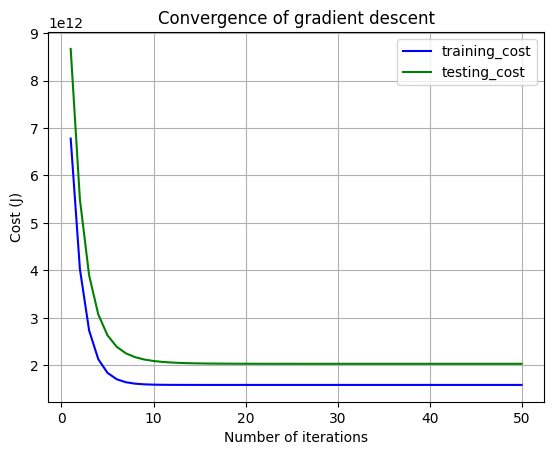

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Problem 1.b

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))

In [ ]:
inputs = get_modified_inputs(inputs)
print(inputs.shape)

In [ ]:
thetas = np.zeros([inputs.shape[1],1])
print(thetas)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.30, random_state=0)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.00000001)

In [ ]:
print("Final Theta values:")
print(thetas)

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Problem 2.a

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1)

In [ ]:
print("Final Theta values:")
print(thetas)

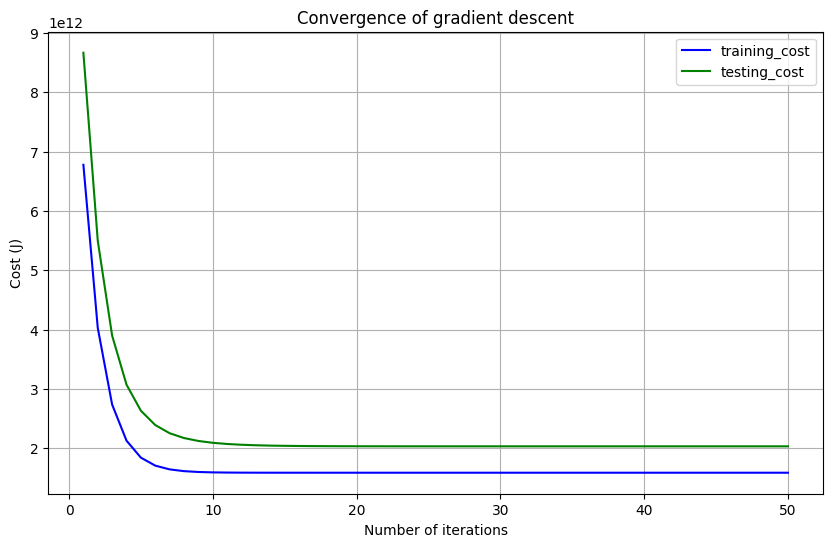

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Using Normalization as Pre-processing

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)

Input shape: (545, 5)
Target shape: (545, 1)
(545, 6)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(inputs)
norm.fit(inputs)
inputs = norm.transform(inputs)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1)

Epoch 0, Train Loss 10800895653085.328125
Epoch 0, Test Loss 11618231099079.878906
Epoch 10, Train Loss 2843395993760.916992
Epoch 10, Test Loss 3143709978656.503418
Epoch 20, Train Loss 1875949340246.915039
Epoch 20, Test Loss 1995988998865.180664
Epoch 30, Train Loss 1758330325116.322998
Epoch 30, Test Loss 1815512189320.851074
Epoch 40, Train Loss 1744030557258.968506
Epoch 40, Test Loss 1779295254433.078369


In [ ]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083000e+02]
 [4.70505571e+06]
 [2.30828277e+03]
 [1.22147651e+03]
 [1.71654227e+03]
 [9.20536396e+02]]


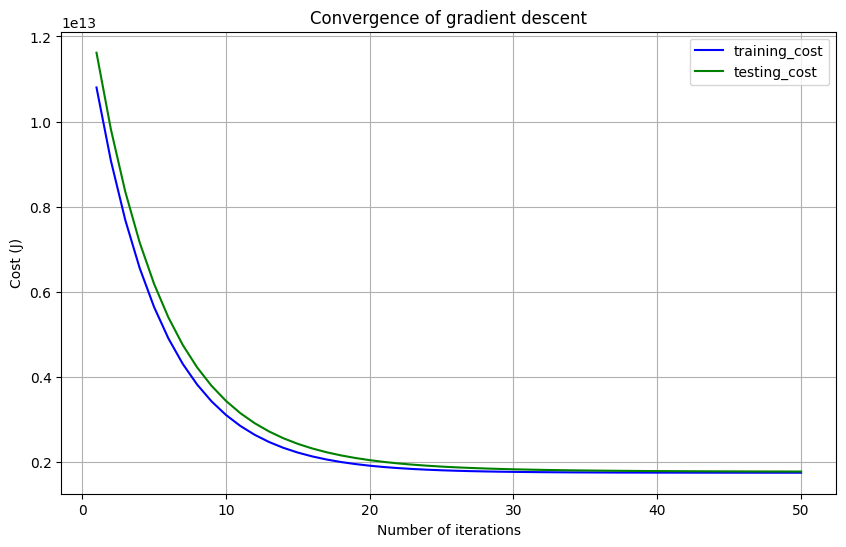

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Problem 2.b

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)
norm = Normalizer().fit(inputs)
norm.fit(inputs)
inputs = norm.transform(inputs)

Input shape: (545, 11)
Target shape: (545, 1)
(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1)

Epoch 0, Train Loss 10800895750834.353516
Epoch 0, Test Loss 11618231204536.466797
Epoch 10, Train Loss 2843396084726.845703
Epoch 10, Test Loss 3143710097224.407715
Epoch 20, Train Loss 1875949310198.499512
Epoch 20, Test Loss 1995988988923.240479
Epoch 30, Train Loss 1758330261969.551025
Epoch 30, Test Loss 1815512139905.787598
Epoch 40, Train Loss 1744030484079.356201
Epoch 40, Test Loss 1779295191697.085938


In [ ]:
print("Final Theta values:")
print(thetas)

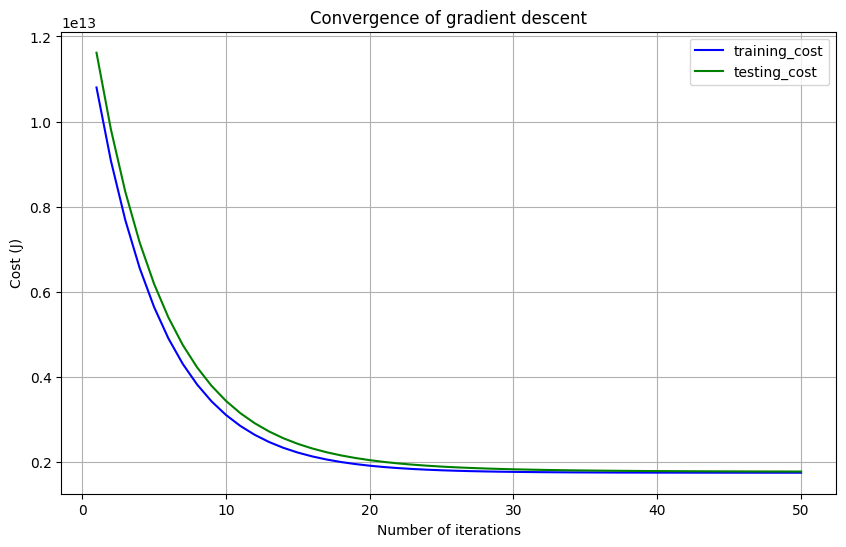

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Using standardization as Pre-processing

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

Input shape: (545, 11)
Target shape: (545, 1)
(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1)

Epoch 0, Train Loss 12526202542348.935547
Epoch 0, Test Loss 13249635417152.986328
Epoch 10, Train Loss 11911507258807.958984
Epoch 10, Test Loss 12192718667185.066406
Epoch 20, Train Loss 11893107794992.816406
Epoch 20, Test Loss 12215974079543.798828
Epoch 30, Train Loss 11889144991454.181641
Epoch 30, Test Loss 12247746546361.619141
Epoch 40, Train Loss 11888068502928.650391
Epoch 40, Test Loss 12265082730115.802734


In [ ]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[     0.        ]
 [472141.06587539]
 [ 54446.62132404]
 [596678.09303336]
 [246438.39998024]
 [257487.12969862]
 [-26828.90301072]
 [204833.99370448]
 [246200.69875284]
 [363740.58684392]
 [218536.74136699]
 [297829.68051459]]


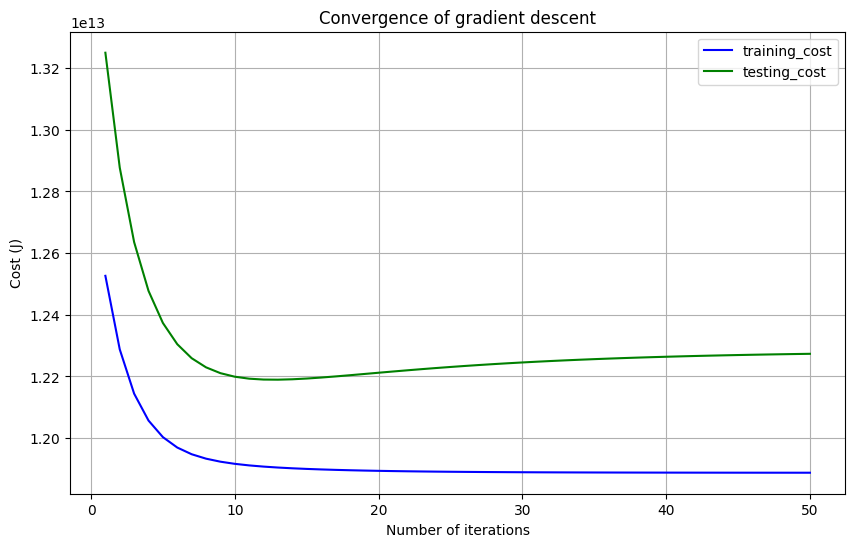

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Problem 3a


using normalization as pre processing

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)
norm = Normalizer().fit(inputs)
norm.fit(inputs)
inputs = norm.transform(inputs)

Input shape: (545, 5)
Target shape: (545, 1)
(545, 6)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1, lamda=0.1)

Epoch 0, Train Loss 10800921303899.310547
Epoch 0, Test Loss 11618333702335.802734
Epoch 10, Train Loss 2845090779352.983887
Epoch 10, Test Loss 3149088601956.582520
Epoch 20, Train Loss 1878339923069.019287
Epoch 20, Test Loss 2004609446199.657227
Epoch 30, Train Loss 1760865391638.242920
Epoch 30, Test Loss 1825331670665.858398
Epoch 40, Train Loss 1746590467347.401123
Epoch 40, Test Loss 1789531120074.198975


In [ ]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


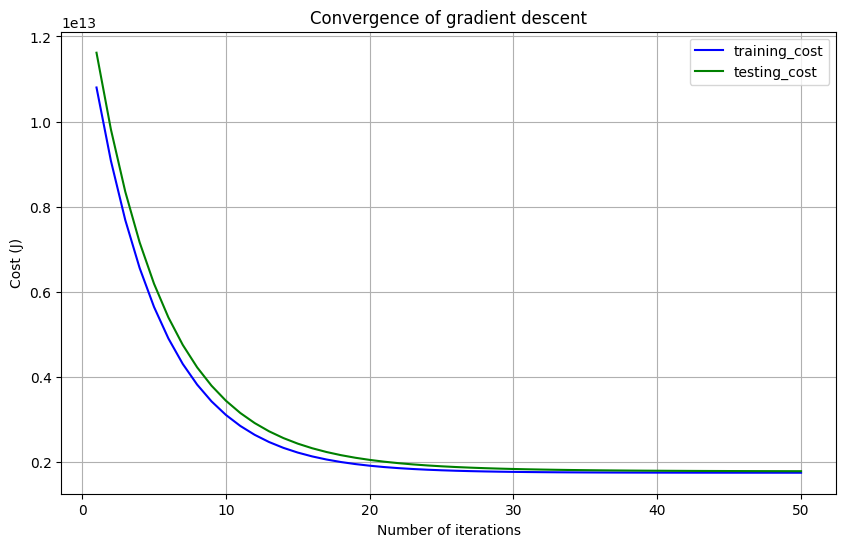

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

Problem 3.b

using normalization as pre processing

In [ ]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
data = df[num_vars]
target_column ='price'# Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+str(inputs.shape))
print("Target shape: "+str(targets.shape))
inputs = get_modified_inputs(inputs)
print(inputs.shape)
thetas = np.zeros([inputs.shape[1],1])
print(thetas)
norm = Normalizer().fit(inputs)
norm.fit(inputs)
inputs = norm.transform(inputs)

Input shape: (545, 11)
Target shape: (545, 1)
(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [ ]:
n_epochs=50
thetas, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.2, lamda=0.1)

Epoch 0, Train Loss 8899759945289.500000
Epoch 0, Test Loss 9629202828443.031250
Epoch 10, Train Loss 1827014679856.642334
Epoch 10, Test Loss 1932874843739.096680
Epoch 20, Train Loss 1745564748560.491211
Epoch 20, Test Loss 1784972634315.487549
Epoch 30, Train Loss 1744626681473.577393
Epoch 30, Test Loss 1776908752185.921631
Epoch 40, Train Loss 1744615790314.104248
Epoch 40, Test Loss 1776133223427.591797


In [ ]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[1.71593235e+02]
 [4.72827912e+06]
 [1.51223531e+03]
 [1.10998096e+03]
 [1.57059778e+03]
 [5.42662978e+02]
 [3.67205190e+02]
 [3.65917961e+02]
 [1.06686840e+02]
 [7.72405160e+02]
 [1.22572247e+03]
 [4.88768142e+02]]


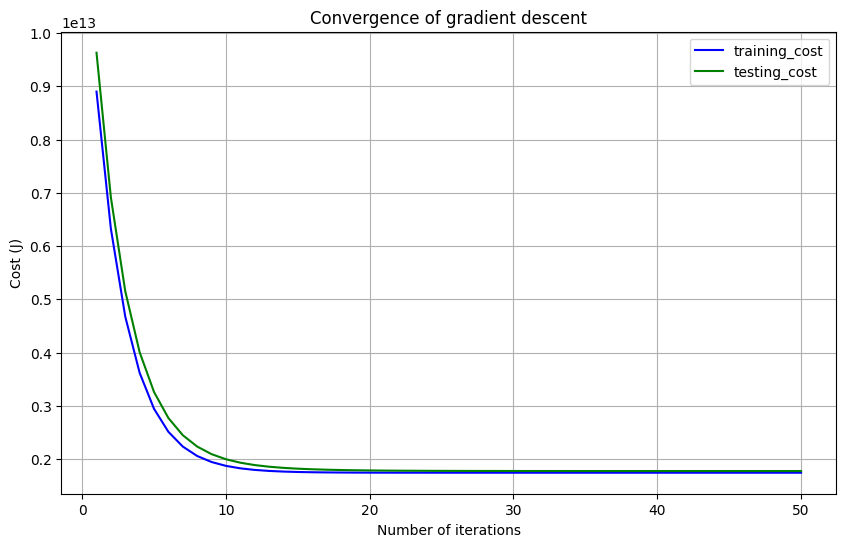

In [ ]:
plt.plot(range(1, n_epochs +1),train_cost_history, color='blue', label='training_cost')
plt.plot(range(1, n_epochs +1),test_cost_history, color='green', label ='testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()